In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Add the directory containing diffusive_nested_sampling to sys.path
sys.path.append(os.path.abspath( "../.."))
import spike_and_slab

In [3]:
def log_likelihood(x):
    '''
    20-D spike and slab likelihood function

    @param x : coordinate
    @return L : likelihood
    '''
    u = 0.01
    v = 0.1

    # Spike
    t1 = np.sum(-0.5 * (x / v) ** 2) - x.size * np.log(v * np.sqrt(2 * np.pi))
    
    # Slab
    t2 = np.sum(-0.5 * ((x - 0.031) / u) ** 2) - x.size * np.log(u * np.sqrt(2 * np.pi)) + np.log(100.0)

    logL = np.logaddexp(t1, t2)
    return logL

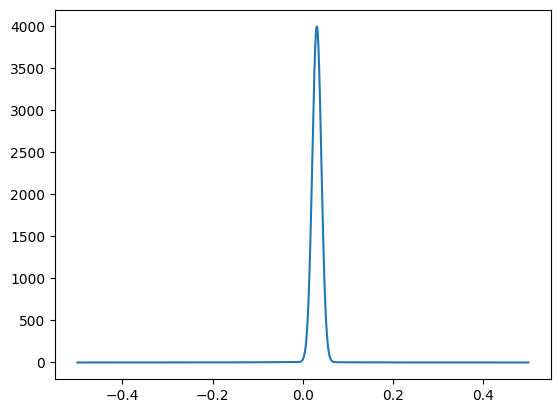

In [4]:
x = np.linspace(-0.5, 0.5, 10000)
y = np.exp([log_likelihood(x_i) for x_i in x])
plt.plot(x, y)
# plt.plot(x, y_spike)
# plt.plot(x, y_slab)
plt.show()

In [ ]:
chain, levels, js = spike_and_slab.main()

/home/tom-egg/Research/nested_sampling/diffusive_nested_sampling/levels.py:24: RuntimeWarning: divide by zero encountered in log
  self.levels = [Level(0, np.log(0.0), prev=None)]    # levels are initialized with index, logL, and a previous logX if exists
  9%|▉         | 36/400 [00:50<08:55,  1.47s/it]

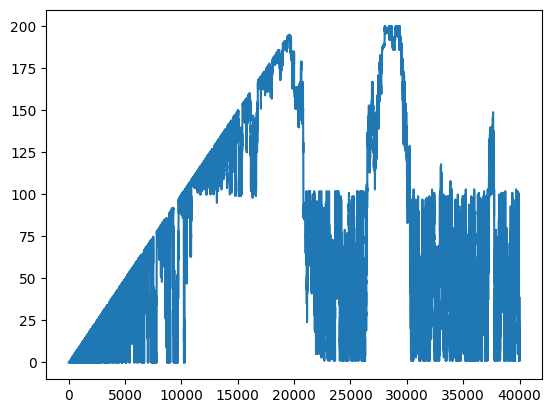

In [ ]:
y = js[::100]
x = range(len(y))
plt.plot(x, y)
plt.show()

/tmp/ipykernel_194578/825883765.py:4: RuntimeWarning: divide by zero encountered in log
  y_prime = [np.log(levels.get_level(i).exceeds / levels.get_level(i).visits_x_adj) for i in range(len(list_levels))]
/tmp/ipykernel_194578/825883765.py:4: RuntimeWarning: invalid value encountered in scalar divide
  y_prime = [np.log(levels.get_level(i).exceeds / levels.get_level(i).visits_x_adj) for i in range(len(list_levels))]


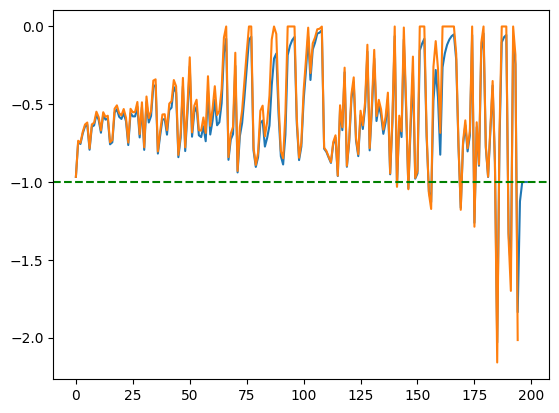

-0.5844538110456031


In [7]:
list_levels = [levels.get_level(i) for i in range(levels.max_J)]
Xs = np.array([level.get_log_X for level in list_levels])
y = Xs[1:] - Xs[:-1]
y_prime = [np.log(levels.get_level(i).exceeds / levels.get_level(i).visits_x_adj) for i in range(len(list_levels))]
x = range(len(y))
plt.plot(x, y)
plt.plot(y_prime)
plt.axhline(y=-1.0,linestyle='--', color='green')
plt.show()
print(np.mean(y))

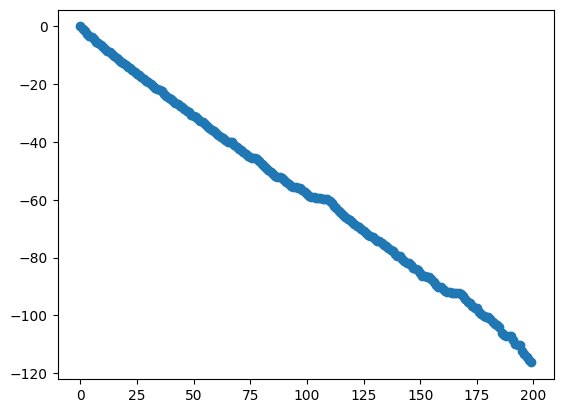

In [8]:
plt.scatter(np.arange(len(Xs)), Xs)

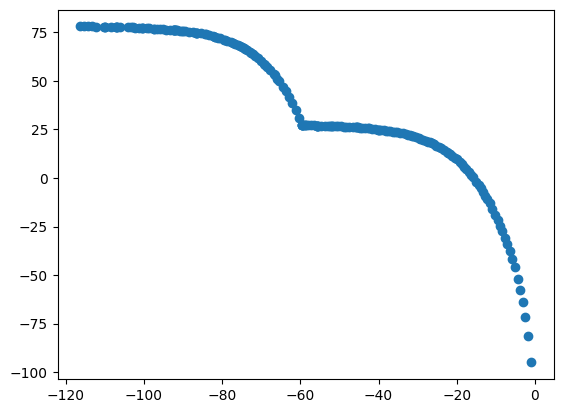

In [9]:
logL = [level.log_likelihood_bound for level in list_levels]
logX = [level.get_log_X for level in list_levels]
plt.scatter(logX, logL)

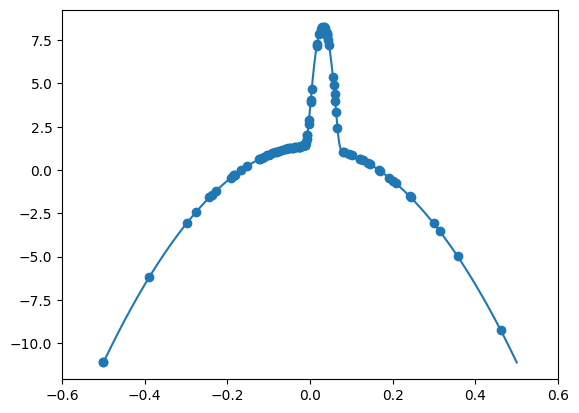

In [10]:
pos = chain['x'][-100:][:,6]
x = np.linspace(-0.5, 0.5, 10000)
y = np.array([log_likelihood(x_i) for x_i in x])
plt.plot(x, y)
plt.scatter(pos, [np.array(log_likelihood(position)) for position in pos])
#plt.ylim(0, 10)
plt.xlim(-0.6, 0.6)
plt.show()

In [11]:
# Compute logZ
log_Ls = np.sort(chain['L'])
logL_bins = [level.log_likelihood_bound for level in list_levels]
logX_bins = [level.get_log_X for level in list_levels]

# Find the right index
indices = np.searchsorted(logL_bins, log_Ls, side='right')

# Find the lower and upper boundaries
lower_bounds = np.array([list_levels[i - 1].get_log_X if i > 0 else None for i in indices])
upper_bounds = np.array([list_levels[i].get_log_X if i < len(logL_bins) else None for i in indices])
lower_bounds = np.array([low if low is not None else np.min(logX_bins) for low in lower_bounds])
upper_bounds = np.array([up if up is not None else np.max(logX_bins) for up in upper_bounds])

# Compute random uniform logX values
log_Xs = np.sort([np.random.uniform(lower, upper) for lower, upper in zip(lower_bounds, upper_bounds)])[::-1]
log_ws = np.log(np.exp(log_Xs[:-1]) - np.exp(log_Xs[1:]))

# Get logZ
log_Z = np.log(np.sum(np.exp(log_ws + log_Ls[1:])))
print(log_Z)

4.001909865141647


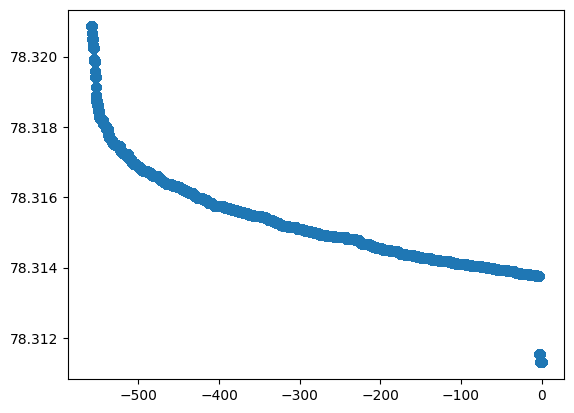

In [12]:
plt.scatter(log_Xs, log_Ls)

In [13]:
i = 57
print(list_levels[i].exceeds)
print(list_levels[i].visits_x_adj)
print(list_levels[i].exp_visits)
print(list_levels[i].total_visits)
print(list_levels[i-1].exceeds / list_levels[i-1].visits_x_adj)

0.0
5890.0
99.50248756218905
19585.0
0.0


In [14]:
print(levels.current_max_J)
print(levels.max_J)
levels.get_acceptance_ratio(98, 119, None)

200
200


np.float64(3890.663033534535)